# 1. Introduction
# Time Series - SARIMAX

The Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX) is an extension of the SARIMA model that also includes the modeling of exogenous variables.
Exogenous variables are also called covariates and can be thought of as parallel input sequences that have observations at the same time steps as the original series. The primary series may be referred to as endogenous data to contrast it from the exogenous sequence(s). The observations for exogenous variables are included in the model directly at each time step and are not modeled in the same way as the primary endogenous sequence (e.g. as an AR, MA, etc. process).
The SARIMAX method can also be used to model the subsumed models with exogenous variables, such as ARX, MAX, ARMAX, and ARIMAX.

`The method is suitable for univariate time series with trend and/or seasonal components and exogenous variables.`

**It may be useful to do a co-relation analysis on variables before putting them as exogenous variables.**

Pearson’s Correlation shows a linear relation between 2 variables, to interpret the results, we first look at the p-value, if it is less that 0.05 then the value of coefficient is significant, else the value of coefficient is not significant. For significant p-value, a positive value of correlation coefficient indicates positive correlation, and a negative value indicates a negative correlation.


# 2 Import the required package

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
plt.rcParams["axes.grid"]=True
from statsmodels.graphics.tsaplots  import plot_acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX


# 3. import the time series data
In this project, I will be using the us_retail dataset(Clothing column). The dataset consist of monthly records of sale across various retails sales in us, the data was download from kaggle site 

In [138]:
path="C:/Users/pc/Desktop/1/Data Science/Deep Learning/Time Series/comp/"
df = pd.read_csv(path + "us_retail_sales.csv")
df.head()

,Month,Clothing,Appliances,FoodAndBeverage,Automobiles,GeneralMerchandise,BuildingMaterials
0,1992-01,6938,3657,29589,26788,14996,8964
1,1992-02,7524,3490,28570,28203,16015,9023
2,1992-03,8475,3669,29682,31684,17984,10608
3,1992-04,9401,3527,30228,32547,18872,11630
4,1992-05,9558,3571,31677,32883,20037,12327


In [139]:
# extract the neede columns
df_Automobiles= df[[ "Month","Automobiles"]]
df_Automobiles.head()

,Month,Automobiles
0,1992-01,26788
1,1992-02,28203
2,1992-03,31684
3,1992-04,32547
4,1992-05,32883


In [140]:
# check the summary of the data
df_Automobiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        336 non-null    object
 1   Automobiles  336 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


the month column is of object data type. First i will convert it to datetime and make it as index of the dataframe

In [141]:
df_Automobiles["Month"]= pd.to_datetime(df_Automobiles["Month"], format="%Y-%m")

<ipython-input-141-3b443c5d36f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Automobiles["Month"]= pd.to_datetime(df_Automobiles["Month"], format="%Y-%m")


In [142]:
df_Automobiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        336 non-null    datetime64[ns]
 1   Automobiles  336 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.4 KB


In [143]:
# set the month column as index
df_Automobiles.set_index("Month", inplace=True)

# 4. Time Series Analysis

# 4.1 Missing values

In [144]:
# check for missing values
df_Automobiles.isna().sum()

Automobiles    0
dtype: int64

# 4.2 Plot the time series dat

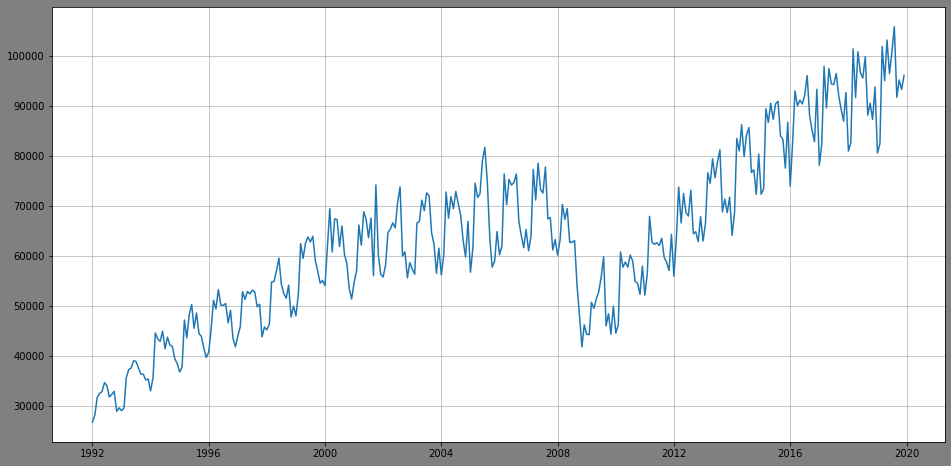

In [145]:
fig, ax = plt.subplots(figsize=(16, 8), facecolor=("grey"))
ax.grid(True, alpha=.9)
ax.plot(df_Automobiles)

# 4.3  Time Series Decomposition
 

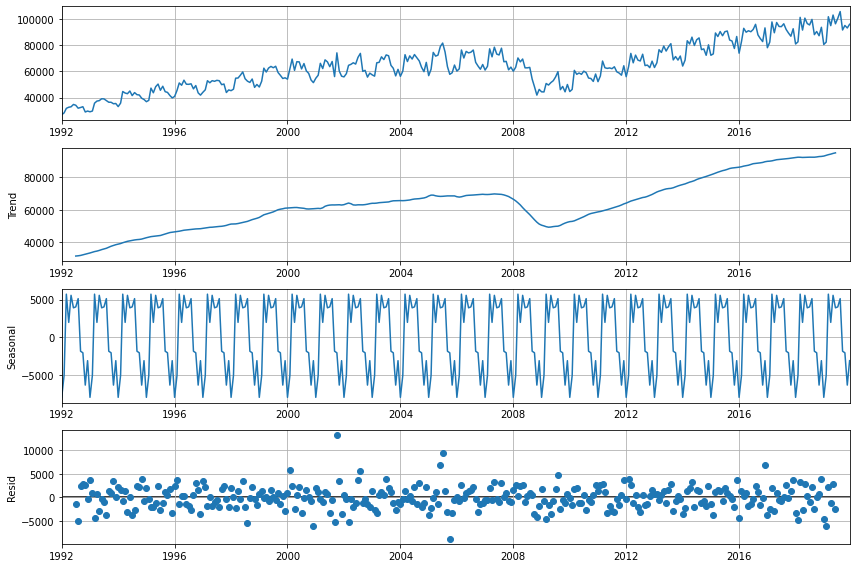

In [146]:
# additive decomposition
plt.rcParams["figure.figsize"]= (12,8)
from statsmodels.tsa.seasonal import seasonal_decompose
add_decompose = seasonal_decompose(df_Automobiles, model="add")
fig= add_decompose.plot()
plt.show()

# 4.4 plot the trend the dataset

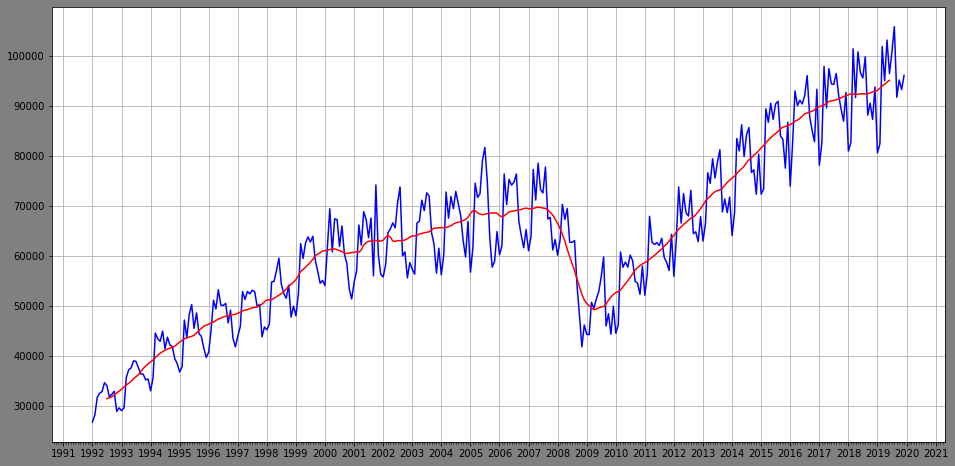

In [147]:
# plt.rcParams['figure.figsize']= (16, 8)

from matplotlib import dates as date
fig, ax = plt.subplots(figsize=(16,8), facecolor=("grey"))
ax.grid(True)


year= date.YearLocator(month=1)
month = date.MonthLocator()
yearformat = date.DateFormatter("%Y")
monthformat = date.DateFormatter("%m")

ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True)
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(yearformat)



plt.plot(df_Automobiles.index, df_Automobiles.values, c="blue")
plt.plot(add_decompose.trend.index, add_decompose.trend, c="red")

# 4.5 Plot the seasonal plot of the time series data

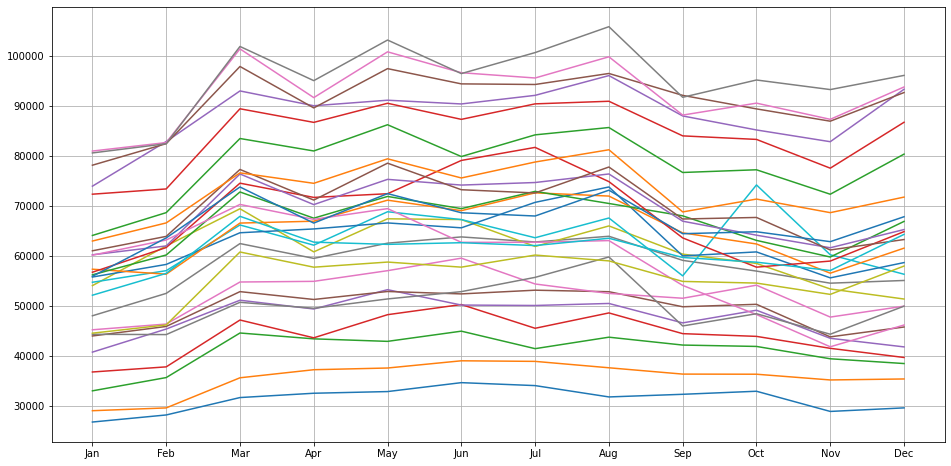

In [148]:
plt.figure(figsize=(16, 8))
plt.grid(True)
# Prepare data

df_seaoanl=df_Automobiles.copy()
df_seaoanl['year'] = [d.year for d in df_seaoanl.index.date]
df_seaoanl['month'] = [d.strftime('%b') for d in df_seaoanl.index.date]
years = df_seaoanl['year'].unique()
#fig, ax = plt.subplots(figsize=(16,8), facecolor=("grey"))
#ax.facecolor=("grey")

# make the plot
for i, n in enumerate(years):
    if i>=0:
        plt.plot("month","Automobiles" ,data=df_seaoanl[df_seaoanl["year"]==n])


The plot above show the seasonality of the dataset. And it can be seen from the plot that there is always increase of sale Clothing from nov to dec 

# 4.6. How to test for stationarity?


In [149]:
df_Automobiles

,Automobiles
Month,
1992-01-01,26788
1992-02-01,28203
1992-03-01,31684
1992-04-01,32547
1992-05-01,32883
...,...
2019-08-01,105884
2019-09-01,91758
2019-10-01,95219


In [150]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df_Automobiles, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')



ADF Statistic: -1.0985924133816318
p-value: 0.7156329078852922
Critial Values:
   1%, -3.451082300831733
Critial Values:
   5%, -2.87067210822307
Critial Values:
   10%, -2.5716355136268345


the the p values is greater than 0.05 which implies that there is not stationarity in the dataset. Also since the auto regression model work well on the data without seasonality and trend, I will detrend Moving Average the dataset

# 5 Built the model

# 5.1 Method 1 : Moving Average

In [151]:
df_Automobiles["FoodAndBeverage"]=df["FoodAndBeverage"].values

<ipython-input-151-cc7c769ad644>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Automobiles["FoodAndBeverage"]=df["FoodAndBeverage"].values


In [152]:
df_Automobiles

,Automobiles,FoodAndBeverage
Month,,
1992-01-01,26788,29589
1992-02-01,28203,28570
1992-03-01,31684,29682
1992-04-01,32547,30228
1992-05-01,32883,31677
...,...,...
2019-08-01,105884,66937
2019-09-01,91758,62420
2019-10-01,95219,64849


In [153]:
split = len(df_Automobiles) - int(len(df_Automobiles) * .3)

train = df_Automobiles[["Automobiles", "FoodAndBeverage"]][:split].rename(columns={"Automobiles": "Automobiles_train"
                                                                          ,"FoodAndBeverage":"FoodAndBeverage_train"})
test = df_Automobiles[["Automobiles", "FoodAndBeverage"]][split:].rename(columns={"Automobiles": "Automobiles_test"
                                                                             ,"FoodAndBeverage":"FoodAndBeverage_test"})


In [154]:
train

,Automobiles_train,FoodAndBeverage_train
Month,,
1992-01-01,26788,29589
1992-02-01,28203,28570
1992-03-01,31684,29682
1992-04-01,32547,30228
1992-05-01,32883,31677
...,...,...
2011-04-01,62778,50588
2011-05-01,62333,51441
2011-06-01,62666,51040


<AxesSubplot:xlabel='Month'>

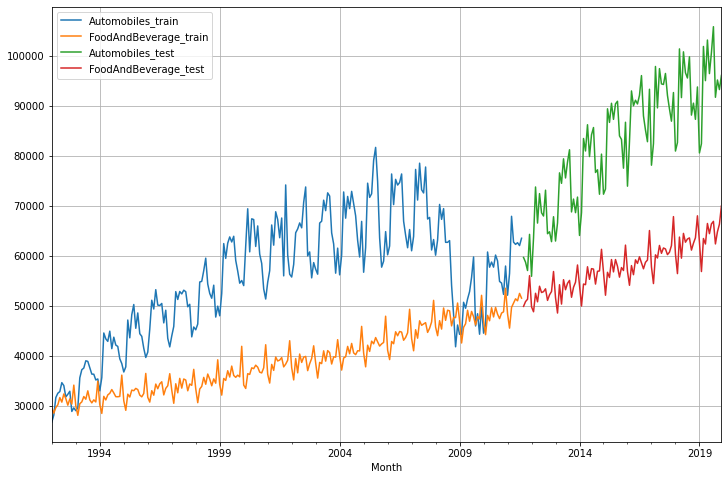

In [155]:
train.Automobiles_train.plot(legend=True)
train.FoodAndBeverage_train.plot(legend=True)
test.Automobiles_test.plot(legend=True)
test.FoodAndBeverage_test.plot(legend=True)



In [158]:
from scipy.stats.stats import pearsonr
x = train['Automobiles_train'].values
yy = train['FoodAndBeverage_train'].values

corr , p = pearsonr(x,yy)
print ('Corelation Coefficient =', corr,'\nP-Value =',p)


Corelation Coefficient = 0.5852902483898944 
P-Value = 4.313589106647423e-23


In [172]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(x, exog = yy, order = (5, 1, 5), seasonal_order = (2, 0, 1, 6) ,enforce_stationarity=False, 
                enforce_invertibility = False)
model_fit = model.fit(disp = False)

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [173]:
predictedss = pd.DataFrame(model_fit.forecast(len(test),exog=y_), index=test.index, columns=["Predict"])


<AxesSubplot:xlabel='Month'>

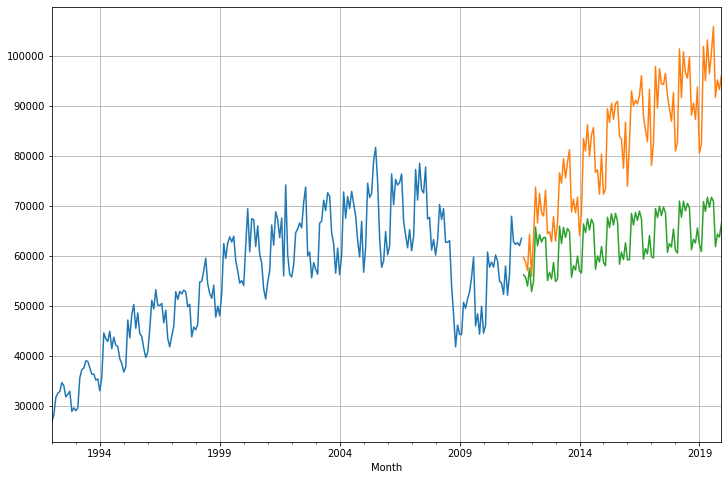

In [174]:
y=test.loc[:,["Automobiles_test"]]
y["predict"]=predictedss["Predict"].values
train.Automobiles_train.plot()
y.Automobiles_test.plot()
y.predict.plot()

# 6 Evaluate the method 1

In [175]:
naive_prediction_rmse = np.sqrt(mean_squared_error(y.Automobiles_test,y.predict ))
naive_prediction_r2 = r2_score(y.Automobiles_test,y.predict  )

In [176]:
result= pd.DataFrame([{"Method": "SARIMAX", "RMSE":naive_prediction_rmse, "r2":naive_prediction_r2}])
result

,Method,RMSE,r2
0,SARIMAX,21123.25812,-2.114322


# Reference

1. kaggle.com
2. tutorialpoint.com